In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import numpy as np
import json
import sys

from os.path import join
from os import listdir

In [2]:
BASE_DIR = join(join('..', 'data'))

Get the levels and their associated ratings for difficulty and enjoyment from the player study.

In [3]:
with open(join(BASE_DIR, 'levels.json'), 'r') as f:
    levels = json.load(f)

In [4]:
level_to_difficulty = {}
level_to_enjoyment = {}

with open(join(BASE_DIR, 'level_to_stats.csv'), 'r') as f:
    f.readline() # skip first line
    
    for line in f.readlines():
        level_id, difficulty, enjoyment = line.strip().split(',')
        level_to_difficulty[level_id] = float(difficulty)
        level_to_enjoyment[level_id] = float(enjoyment)

I didn't need to do this in hindsight, but here are links as a directed graph.

In [5]:
with open(join(BASE_DIR, 'links.json'), 'r') as f:
    old_links = json.load(f)
    
def remove_trailing_zero(key: str):
    return('_'.join((key.split(',')[:2])))

links = {}
for src_key in old_links:
    new_src_key = remove_trailing_zero(src_key)
    links[new_src_key] = {}
    
    for tgt_key in old_links[src_key]:
        new_tgt_key = remove_trailing_zero(tgt_key)
        links[new_src_key][new_tgt_key] = old_links[src_key][tgt_key]
        
del old_links

Get info needed for the graphs

In [6]:
WIDTH = max(int(level_id.split('_')[0]) for level_id in level_to_difficulty)
HEIGHT = max(int(level_id.split('_')[1]) for level_id in level_to_difficulty)

In [7]:
HEIGHT

17

Graph Difficulty and Enjoyment MDPs

In [8]:
def construct_matrix_and_mask_to_graph(level_to_ratings):
    matrix = [[np.nan for _ in range(WIDTH + 1)] for __ in range(HEIGHT + 1)]
    
    for key, rating in level_to_ratings.items():
        coords = list(int(x) for x in key.split('_'))
        matrix[coords[1]][coords[0]] = rating
        
    mask = np.zeros_like(np.array(matrix))
    for i, row in enumerate(matrix):
        for j, val in enumerate(row):
            if val == np.nan:
                mask[i][j] = 1.0
    
    return matrix, mask

In [9]:
def make_plot(title, ratings):
    matrix, mask = construct_matrix_and_mask_to_graph(ratings)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.color_palette('viridis')
    ax = sns.heatmap(
        matrix, 
        linewidths=.5, 
        square=True, 
        mask=mask,
        cmap='RdYlGn',
        cbar_kws={'label': f'{title} Rating'},
        vmin=1,
        vmax=7.0)
    
    ax.set_xlabel('Density', fontsize=14)
    ax.set_ylabel('Leniency', fontsize=14)
    
    ax.set_xticks(ax.get_xticks()[::5])
    ax.set_yticks(ax.get_yticks()[::5])

    plt.title(f'{title} Ratings', fontsize=18)
    ax.invert_yaxis()
    plt.savefig(f'{title.lower()}.pdf', bbox_inches="tight")
    plt.show()
    plt.close()

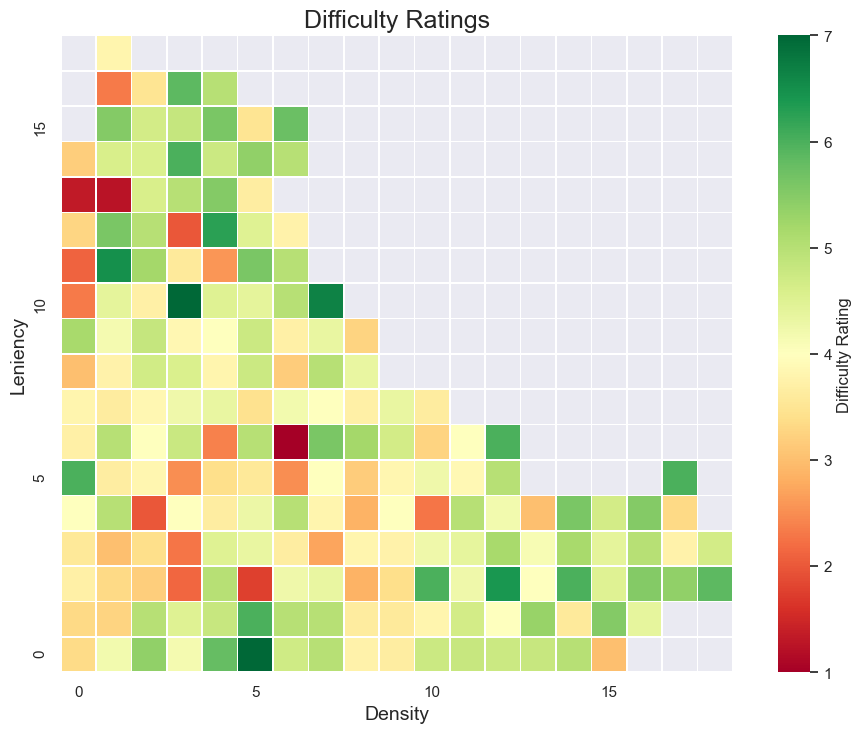

In [10]:
make_plot('Difficulty', level_to_difficulty)

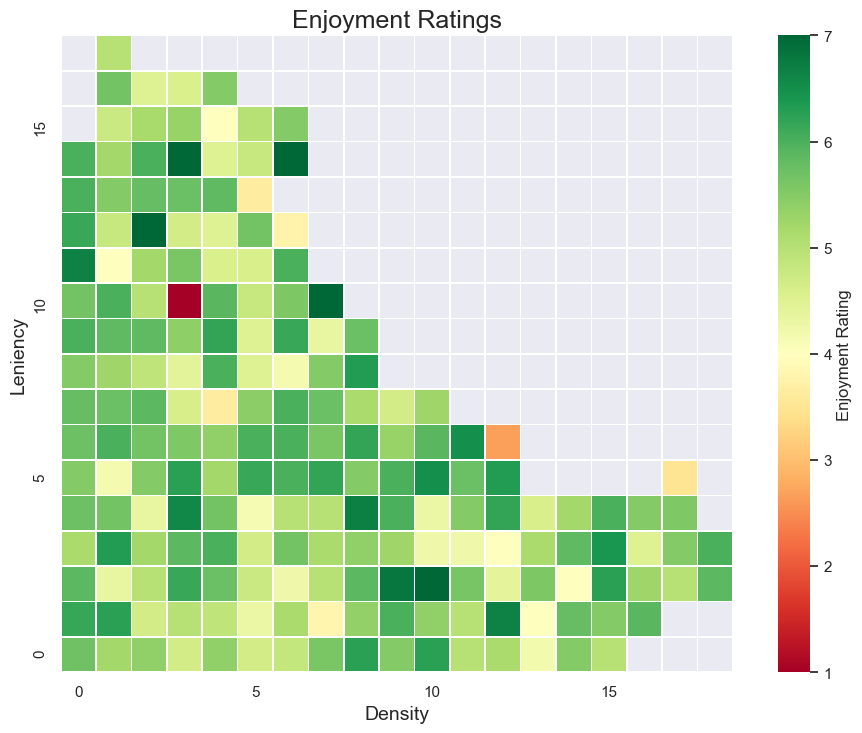

In [11]:
make_plot('Enjoyment', level_to_enjoyment)